In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lcs import *
import networkx as nx
from scipy.stats import beta
import time

In [3]:
G = nx.karate_club_graph()
G = nx.fast_gnp_random_graph(50, 5.0 / 49)

A = nx.adjacency_matrix(G, weight=None)
n = A.shape[0]

In [4]:
rho0 = 1

x0 = np.zeros(n)
x0[list(random.sample(range(n), int(rho0 * n)))] = 1

alpha = 0
gamma = 0.1
b = 0.04

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c = contagion_function(np.arange(n), b)

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=1000, random_seed=None)

In [16]:
A = A.todense()

In [22]:
p_c = np.ones((2, n))

p_rho = [1, 1]

rho0 = beta(p_rho[0], p_rho[1]).rvs()
print(rho0)

A0 = nx.adjacency_matrix(nx.fast_gnp_random_graph(n, rho0))

samples, l = infer_adjacency_matrix(
    x, A0, p_rho, p_c, nsamples=100, burn_in=10000, skip=1000, return_likelihood=True
)

0.08738094023741233
Acceptance ratio is 0.03851376146788991


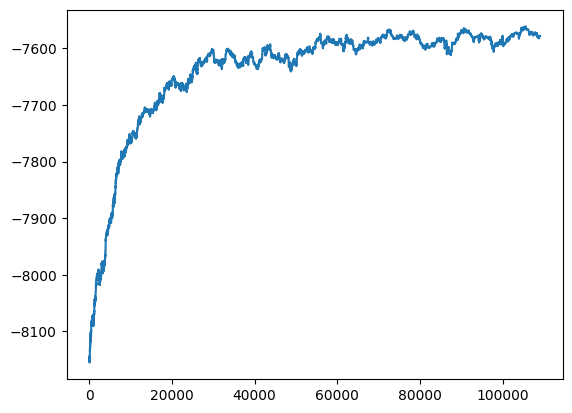

In [23]:
plt.plot(l)

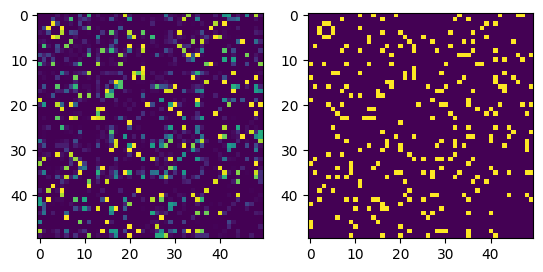

In [25]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p, cmap="viridis", vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(A, vmin=0, vmax=1)

In [26]:
posterior_similarity(A, samples)

0.6071360717407

In [27]:
samples = 1000

gamma = np.zeros(samples)
c_samples = np.zeros((samples, n))

p_rho = np.array([1, 1])
p_gamma = np.array([1, 1])
p_c = np.ones((2, n))

for i in range(1000):
    g, b = infer_dynamics(x, A, p_gamma, p_c)
    gamma[i] = g
    c_samples[i] = b

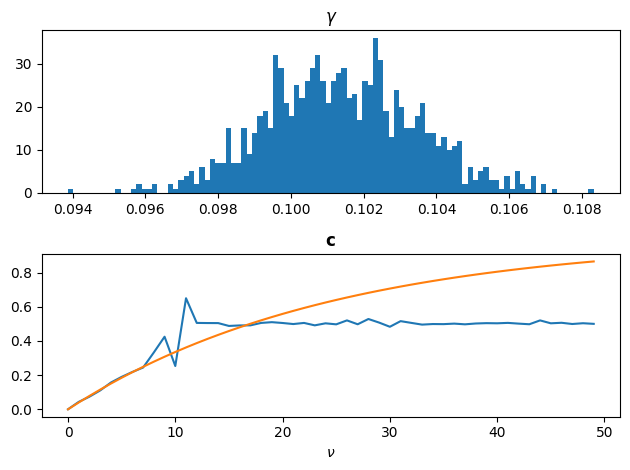

In [28]:
plt.figure()
plt.subplot(211)
plt.title(r"$\gamma$")
plt.hist(gamma, bins=100)

plt.subplot(212)
plt.title(r"$\mathbf{c}$")
plt.plot(np.mean(c_samples, axis=0))
plt.xlabel(r"$\nu$")
plt.plot(c)

plt.tight_layout()
plt.show()